In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 📬 Olá, neste projeto iremos analisar um DataFrame retirado de um gmail e responder algumas perguntas, venha comigo nesta jornada.

### 🗄 Primeiro lendo os arquivos de email para começarmos os trabalhos

In [2]:
email = pd.read_csv("https://raw.githubusercontent.com/vinimedeiros13/Statistic/main/Projeto/Projeto%202/emails_processados.csv")

In [3]:
email.drop('Unnamed: 0', axis='columns', inplace=True)

#### Exibindo uma pequena parte do DataFrame

In [4]:
email.head()

,subject,from,date,to,label,thread,dayofweek,timeofday,year,month
0,=?UTF-8?q?Voc=C3=AA_tem_que_ter_estes_itens_em...,offers@wish.com,2021-02-26 11:57:48-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1692770206194795587,Friday,11.963333,2021,February
1,=?UTF-8?Q?=E3=80=90E-Pal=E3=80=91?=,official@epal.gg,2021-03-06 19:56:44-03:00,viniapnm@gmail.com,inbox,1693525113471893522,Saturday,19.945556,2021,March
2,DSCO is now available!,vsco@official.vsco.co,2021-02-28 21:23:21-03:00,viniapnm@gmail.com,inbox,1692992869753561945,Sunday,21.389167,2021,February
3,=?UTF-8?q?=E2=9A=A1=F0=9F=94=8C_Todo_o_materia...,offers@wish.com,2021-04-24 11:28:52-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1697932412812193275,Saturday,11.481111,2021,April
4,=?UTF-8?q?=F0=9F=8E=89_Confira_o_que_acabou_de...,offers@wish.com,2021-02-04 10:19:29-03:00,"""=?utf-8?q?Vin=C3=ADcius_Medeiros?="" <viniapnm...",inbox,1690770887097317107,Thursday,10.324722,2021,February


## 📬 Temos emails de **2015** até **2021**, emails promocionais especificamente.

## **1) Quantos emails foram mandados por semana, por mês e por ano, considerando a janela de tempo dos dados baixados?**

#### Criando 3 variáveis:
* anos -> Irá armazenar os dados(emails) filtrando por anos
* mes -> Irá armazenar os dados(emails) filtrando por mês
* dia -> Irá armazenar os dados(emails) filtrando por dia

In [5]:
anos = email["year"].value_counts()
mes = email["month"].value_counts()
dia = email["dayofweek"].value_counts()

In [6]:
anos

2019    560
2020    377
2021    152
2016     23
2017     21
2018     19
2015      7
Name: year, dtype: int64

### 📨 Logo de cara percebemos que 2019 foi o ano com mais emails

In [7]:
mes

March        165
April        145
July         124
August       118
May          108
June         102
February      83
January       81
November      77
December      60
September     49
October       47
Name: month, dtype: int64

### 📨 Março e abril são os meses onde mais houveram emails

In [8]:
dia

Tuesday      174
Wednesday    170
Saturday     167
Monday       167
Thursday     164
Friday       163
Sunday       154
Name: dayofweek, dtype: int64

### 📨 Terça e quarta foram os dias da semana onde mais houveram emails

#### Criando listas com strings que usaremos nos gráficos e nos DataFrames

In [9]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Set', 'Ago', 'Out', 'Nov', 'Dez']

In [10]:
total_anos = ("2015", "2016", "2017", "2018", "2019", "2020", "2021")

In [11]:
semanas = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo"]

## 🗃 **Emails por ano**

#### Criando variáveis de cada ano para utilizar na criação de gráficos

In [12]:
ano_2015 = anos[2015]
ano_2016 =  anos[2016]
ano_2017 =  anos[2017]
ano_2018 =  anos[2018]
ano_2019 =  anos[2019]
ano_2020 =  anos[2020]
ano_2021 =  anos[2021]

#### Criando um DataFrame para armazenar a quantidade de emails por anos

In [13]:
_anos = (ano_2015, ano_2016, ano_2017, ano_2018, ano_2019, ano_2020, ano_2021)
aanos = pd.DataFrame(_anos, total_anos)
aanos[0] = aanos[0].round(3)
aanos

,0
2015,7
2016,23
2017,21
2018,19
2019,560
2020,377
2021,152


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

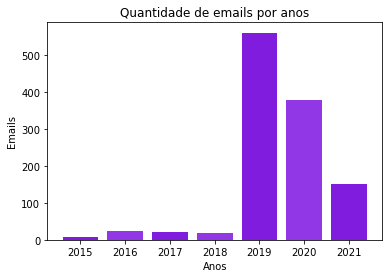

In [14]:
plt.bar(total_anos, _anos, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

### 📉 Então temos 2019 líder de emails, em seguida 2020 e 2021.

## 🗃 **Emails por mês**

#### Criando variáveis para armazenar os dados dos meses e usar posteriormente para plotar gráficos

In [15]:
Janeiro = mes["January"]
Fevereiro = mes["February"]
Março = mes["March"]
Abril = mes["April"]
Maio = mes["May"]
Junho = mes["June"]
Julho = mes["July"]
Agosto = mes["August"]
Setembro = mes["September"]
Outubro = mes["October"]
Novembro = mes["November"]
Dezembro = mes["December"]

#### Criando um DataFrame para armazenar a quantidade de emails por meses

In [16]:
_meses = (Janeiro, Fevereiro, Março, Abril, Maio, Junho, Julho, Agosto, Setembro, Outubro, Novembro, Dezembro)
_Meses = pd.DataFrame(_meses, meses)
_Meses[0] = _Meses[0].round(3)
_Meses

,0
Jan,81
Fev,83
Mar,165
Abr,145
Mai,108
Jun,102
Jul,124
Set,118
Ago,49
Out,47


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

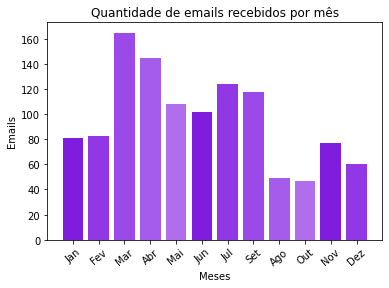

In [17]:
plt.bar(meses, _meses, color=["#801cdd", "#9237e6", "#9c49e9", "#a65ceb", "#b06eed"])
plt.ylabel("Emails")
plt.xticks(rotation=40)
plt.xlabel("Meses")
plt.title("Quantidade de emails recebidos por mês")
plt.show()

### Março foi o mês onde mais houve mensagens, outubro teve a menor quantidade.

### Podemos justificar março com mais emails levando em consideração que março tem alguns feriados como dia da mulher, podendo vir ofertas de produtos femininos. E março é o mês pós virada de ano e carnaval.

## 🗃 **Emails por dias da semana**

#### Criando variáveis para armazenar os dados dos dias da semana e usar posteriormente para plotar gráficos

In [18]:
Segunda = dia["Monday"]
Terça = dia["Tuesday"]
Quarta = dia["Wednesday"]
Quinta = dia["Tuesday"]
Sexta = dia["Friday"]
Sábado = dia["Saturday"]
Domingo = dia["Sunday"]

#### Criando um DataFrame para armazenar a quantidade de emails por dias da semana

In [19]:
_semanas = (Segunda, Terça, Quarta, Quinta, Sexta, Sábado, Domingo)
Semanas = pd.DataFrame(_semanas, semanas)
Semanas

,0
Segunda,167
Terça,174
Quarta,170
Quinta,174
Sexta,163
Sábado,167
Domingo,154


### 📊 Plotando o gráfico para facilitar a visibilidade dos dados:

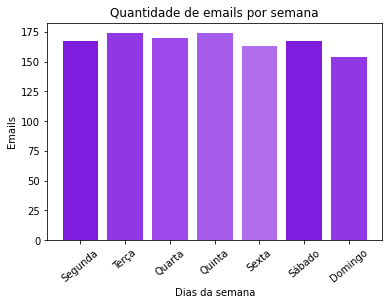

In [20]:
plt.bar(semanas, _semanas, color=["#801cdd", "#9237e6", "#9c49e9", "#a65ceb", "#b06eed"])
plt.ylabel("Emails")
plt.xticks(rotation=40)
plt.xlabel("Dias da semana")
plt.title("Quantidade de emails por semana")
plt.show()

### Não temos uma diferença gritante no dias da semana, está balanceado e dentro dos padrões.

## **2) Há uma variação significativa na quantidade de emails enviados por cada período considerado na questão anterior?**

### Tirando o desvio padrão de ano, mês e dia.

In [21]:
anos.std(ddof=0)

202.94816871229332

In [22]:
mes.std(ddof=0)

35.66851630717986

In [23]:
dia.std(ddof=0)

5.827450872677468

## **3) Existe algum período, dos considerados nas duas questões anteriores, em que o número de emails enviados possa ser considerado um outlier? Você enxerga alguma justificativa para esse período ter esse outlier, caso haja?**

#### DataFrame dos meses criado anteriormente, agora utilizado para plotar um gráfico boxplot.

In [24]:
_Meses

,0
Jan,81
Fev,83
Mar,165
Abr,145
Mai,108
Jun,102
Jul,124
Set,118
Ago,49
Out,47


### 📈 Plotando o boxplot e verificar a existência de um outlier:

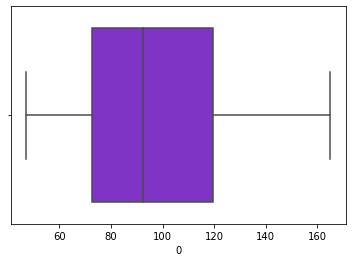

In [25]:
Box_mes = sns.boxplot(x=_Meses[0], color="#801cdd")

#### DataFrame dos anos criado anteriormente, agora utilizado para plotar um gráfico boxplot.

In [26]:
aanos

,0
2015,7
2016,23
2017,21
2018,19
2019,560
2020,377
2021,152


### 📈 Plotando o boxplot e verificar a existência de um outlier

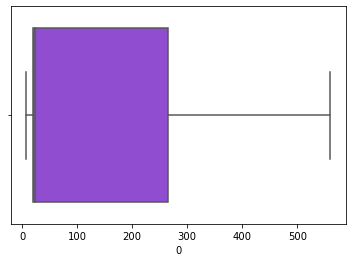

In [27]:
Box_ano = sns.boxplot(x=aanos[0], color="#9237e6")

#### DataFrame dos dias da semana criado anteriormente, agora utilizado para plotar um gráfico boxplot.

In [28]:
Semanas

,0
Segunda,167
Terça,174
Quarta,170
Quinta,174
Sexta,163
Sábado,167
Domingo,154


### 📈 Plotando o boxplot e verificar a existência de um outlier

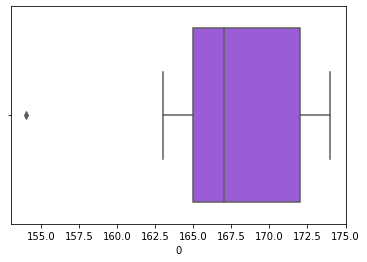

In [29]:
Box_semanas = sns.boxplot(x=Semanas[0], color="#9c49e9")

In [30]:
dia

Tuesday      174
Wednesday    170
Saturday     167
Monday       167
Thursday     164
Friday       163
Sunday       154
Name: dayofweek, dtype: int64

## **4) Qual é o número médio de e-mails por hora? Essa média varia ao longo da semana?**

## Média de emails por semana no mes de abril de 2020

In [31]:
abril= email[email.month=="April"]
Abril2020 = abril[abril.year==2020]
abril2020 = pd.DataFrame(Abril2020[["year","date","dayofweek"]])

In [32]:
25/720

0.034722222222222224

## Média de emails por semana no mes de novembro de 2020

In [33]:
November = email[email.month=="November"]
November2020 = November[November.year==2020]
november2020 = pd.DataFrame(November2020[["year","date","dayofweek"]])

In [34]:
39/720

0.05416666666666667

## **5) Com quem me comunico com mais frequência, por meio de emails? Considere tanto por envio, quanto por recepção de emails**

#### Criando uma lista com os principais remetentes dos e-mails

In [35]:
rec = ["Wish", "Depositphotos", "Motorola", "Googleplay", "iFood", "Canva"]

#### Exibindo os remetentes que mais enviaram e-mails

In [36]:
From = pd.DataFrame(email['from'])
From = From.value_counts().head(6)
From

from                      
offers@wish.com               907
mail@depositphotos.com         75
info@motorola-mail.com         39
news-googleplay@google.com     25
news@news.ifood.com.br         16
start@engage.canva.com         15
dtype: int64

### 📊 Mostrando os dados da tabela graficamente:

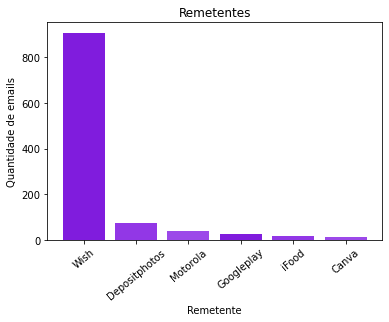

In [37]:
plt.bar(rec, From, color=["#801cdd", "#9237e6", "#9c49e9"])
plt.ylabel("Quantidade de emails")
plt.xticks(rotation=40)
plt.xlabel("Remetente")
plt.title("Remetentes")
plt.show()

### 📉 Wish aparece gritantemente em primeiro, possivelmente por enviar diariamente emails com promoções de produtos

## **6) Quais os temas mais comumente tratados nos emails considerados?**

#### Removendo alguns caracteres indesejados que estão atrapalhando a visualizações dos assuntos dos emails

In [38]:
stopwords = set(STOPWORDS)
stopwords.update(["UTF", '=?UTF-8?q?', "F7", "q", "A7", "A3", "AA", "U", "A5", "A3", "F0", "3F"])

#### Gerando uma núvem de palavras para exibir os assuntos mais presentes nos emails

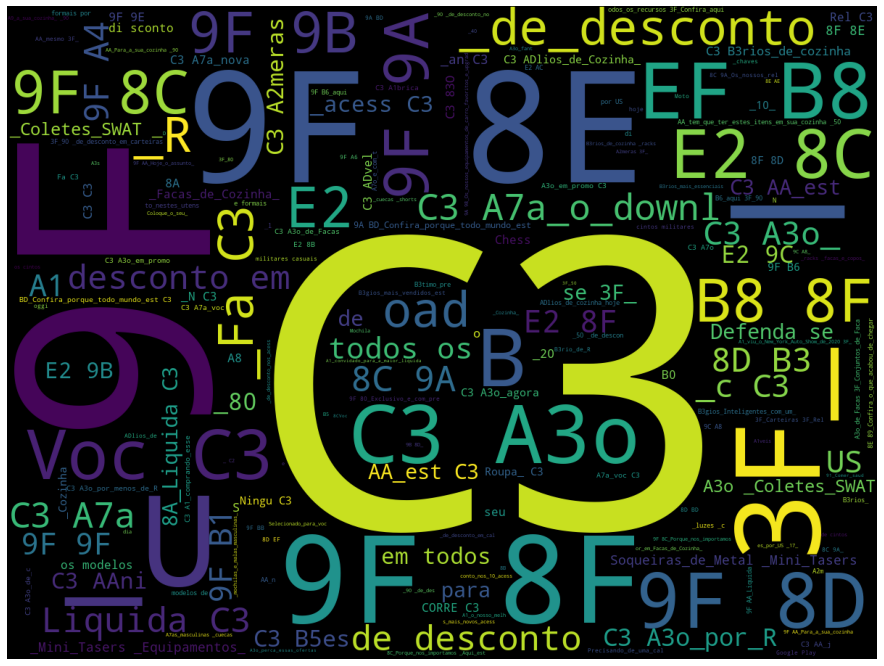

In [39]:
text=  " ".join(s for s in email.subject)
wordcloud = WordCloud(width=1200, height=900, background_color="black", stopwords = stopwords).generate(text)
fig, ax = plt.subplots(figsize=(25,12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

## **Por que os mês de abril recebeu menos emails que novembro no ano de 2020?**

#### Verificando a quantidade de emails recebidos em abril de 2020

In [40]:
abril2020["year"].value_counts()

2020    25
Name: year, dtype: int64

#### Verificando a quantidade de emails recebidos em novembro de 2020

In [41]:
november2020["year"].value_counts()

2020    39
Name: year, dtype: int64

In [42]:
valores = [25, 39]

In [43]:
MESES = ["Abril", "Novembro"]

### 📊 Plotando o gráfico para fazer as comparações

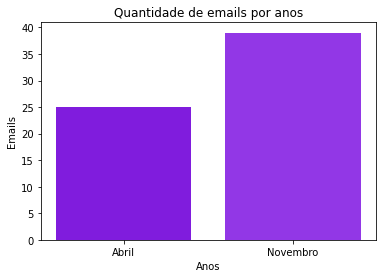

In [44]:
plt.bar(MESES, valores, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Anos")
plt.title("Quantidade de emails por anos")
plt.show()

## **Qual o horário de pico de recebimentos de email?**

In [45]:
email["timeofday"]
horas = email['timeofday'].astype(int)
Horas = horas.value_counts()
listvalues = Horas.values

In [46]:
listhoras = Horas.index

### 📊 Plotando o gráfico

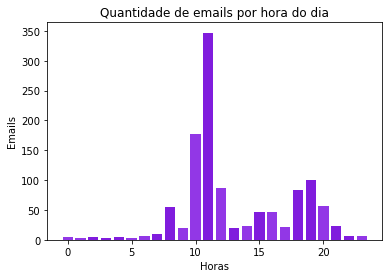

In [47]:
plt.bar(listhoras, listvalues, color=["#801cdd", "#9237e6"])
plt.ylabel("Emails")
plt.xlabel("Horas")
plt.title("Quantidade de emails por hora do dia")
plt.show()